In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



#According to student's failure , goout ,absenses ,health predict whether they will
Pass or fail in Finals(G3)

In [7]:
data = pd.read_csv('student.csv')

In [11]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [13]:
data['failures'].unique()

array([0, 3, 2, 1], dtype=int64)

In [15]:
data['absences'].unique()

array([ 6,  4, 10,  2,  0, 16, 14,  7,  8, 25, 12, 54, 18, 26, 20, 56, 24,
       28,  5, 13, 15, 22,  3, 21,  1, 75, 30, 19,  9, 11, 38, 40, 23, 17],
      dtype=int64)

In [17]:
data['goout'].unique()

array(['high', 'medium', 'low', 'very low', 'very high'], dtype=object)

In [66]:
goout_id = {
    'very low' :0,
    'low':1,
    'medium':2,
    'high':3,
    'very high':4
}
data['goout_id']=data['goout'].map(goout_id)

In [27]:
data['health'].unique()

array(['good', 'excellent', 'very bad', 'bad', 'very good'], dtype=object)

In [29]:
health_id = {
    'good':2,
    'excellent':4,
    'very bad':0,
    'bad':1,
    'very good':3
}
data['health_id']=data['health'].map(health_id)

In [31]:
data['status'] = data['G3'].apply(lambda x: "pass" if x>10 else "fail")

In [35]:
data['status'].unique()

array(['fail', 'pass'], dtype=object)

In [39]:
status_id = {
    'fail':0,
    'pass':1
}
data['status_id'] = data['status'].map(status_id)

In [68]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
goout_id      0
health_id     0
status        0
status_id     0
dtype: int64

In [70]:
features = ['failures','absences','goout_id','health_id']
target = 'status_id'

In [72]:
X = data[features]
Y = data[target]

In [74]:
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size = 0.2,random_state = 42 ,stratify = Y
)

In [75]:
model = LogisticRegression(solver ='liblinear' ,class_weight = 'balanced',random_state =42)

In [78]:
model.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [82]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [85]:
cm = confusion_matrix(Y_pred,Y_test)
print(cm)

[[18 14]
 [19 28]]


In [87]:
cr = classification_report(Y_pred,Y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.49      0.56      0.52        32
           1       0.67      0.60      0.63        47

    accuracy                           0.58        79
   macro avg       0.58      0.58      0.58        79
weighted avg       0.59      0.58      0.59        79



<Axes: >

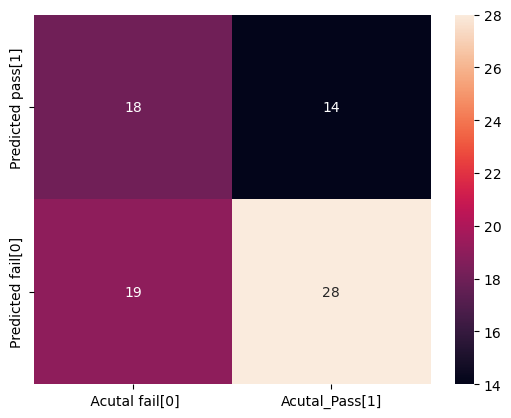

In [92]:
sns.heatmap(cm,annot =True ,xticklabels =[' Acutal fail[0]','Acutal_Pass[1]'],
                           yticklabels = ['Predicted pass[1]','Predicted fail[0]'])

In [103]:
new_pred = {
    'failures' : [2,3],
    'absences':[11,2],
    'goout_id':[1,4],
    'health_id':[0,4]

}


In [113]:
X_new = pd.DataFrame(new_pred)
Y_pred = model.predict(X_new)

In [116]:
X_new['Predicted_Value']= Y_pred
X_new

,failures,absences,goout_id,health_id,Predicted_Value
0,2,11,1,0,0
1,3,2,4,4,0
